# Machine learning with RDkit - Predict solubility 

Now that we know how to handle molecule data we will try to do a first machine learning pipeline to predict solubility

In this exercise, we will use machine learning to predict solubility of molecules. For this purpose, we will borrow a dataset from rdkit that is originated from the Huuskonen dataset. We will try to predict Aqueous Solubility for molecules that is known as "logS". 


This exercise is divided into 3 parts: Preparing a dataset, training a model and preparing dataset for prediction and applying a predictive model.



## Preparing dataset




Download the training set from "https://raw.githubusercontent.com/rdkit/rdkit/master/Docs/Book/data/solubility.train.sdf".



In [1]:
!wget "https://raw.githubusercontent.com/rdkit/rdkit/master/Docs/Book/data/solubility.train.sdf"

--2022-04-17 19:22:27--  https://raw.githubusercontent.com/rdkit/rdkit/master/Docs/Book/data/solubility.train.sdf
Loaded CA certificate '/etc/ssl/certs/ca-certificates.crt'
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1376487 (1.3M) [text/plain]
Saving to: ‘solubility.train.sdf.12’

solubility.train.sd 100%[===================>]   1.31M  4.18MB/s    in 0.3s    

2022-04-17 19:22:28 (4.18 MB/s) - ‘solubility.train.sdf.12’ saved [1376487/1376487]




With the help of rdkit.Chem.SDMolSupplier, get list of molecules contained in this file. You should call this list as **molecule_list**. The option **removeHs=False** should be chosen. 



In [2]:
from rdkit.Chem import SDMolSupplier
molecule_list = SDMolSupplier("solubility.train.sdf", removeHs=False)
len(molecule_list)

1025


Write a function named **calculate_descriptors(mol)** that allows us to calculate descriptors of a molecule. This function takes a Rdkit molecule as input and returns an array vector of descriptors.



In [3]:
import numpy as np
from rdkit.ML.Descriptors.MoleculeDescriptors import MolecularDescriptorCalculator
from rdkit.Chem import Descriptors

descriptor_names = [name for name, _ in Descriptors._descList]
calculator = MolecularDescriptorCalculator(descriptor_names)

def calculate_descriptors(mol):    
    return np.array(calculator.CalcDescriptors(mol))

calculate_descriptors(molecule_list[0])

array([ 2.21180556e+00,  1.34375000e+00,  2.21180556e+00,  1.34375000e+00,
        4.68785510e-01,  7.21510000e+01,  6.00550000e+01,  7.20939004e+01,
        3.20000000e+01,  0.00000000e+00, -5.38313154e-02, -6.53825554e-02,
        6.53825554e-02,  5.38313154e-02,  1.00000000e+00,  1.40000000e+00,
        1.40000000e+00,  1.37449624e+01,  1.02797051e+01,  1.67703372e+00,
       -1.78823480e+00,  1.87806242e+00, -1.58719486e+00,  4.23696242e+00,
        7.71705139e-01,  2.19060969e+00,  7.50977500e+00,  4.12132034e+00,
        4.12132034e+00,  4.12132034e+00,  2.41421356e+00,  2.41421356e+00,
        2.41421356e+00,  1.35355339e+00,  1.35355339e+00,  7.07106781e-01,
        7.07106781e-01,  3.53553391e-01,  3.53553391e-01,  0.00000000e+00,
        1.12451125e+01,  5.00000000e+00,  4.00000000e+00,  4.00000000e+00,
        3.41990195e+01,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  


Apply the function **caluclate_descriptors** to the list of molecules **molecule_list** and store the result in a dataframe named **df**. Look at few rows of **df** to see whether the descriptors are calculated.

Get alslow the sollubity with the GetProp method



In [4]:
import pandas as pd
import numpy as np

data = [calculate_descriptors(mol) for mol in molecule_list]
df = pd.DataFrame(data, columns=descriptor_names)

In [5]:
df

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,2.211806,1.343750,2.211806,1.343750,0.468786,72.151,60.055,72.093900,32.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.500000,1.500000,1.500000,1.500000,0.408362,70.135,60.055,70.078250,30.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.231806,1.355000,2.231806,1.355000,0.462954,86.178,72.066,86.109550,38.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2.253472,0.898148,2.253472,0.898148,0.483890,86.178,72.066,86.109550,38.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.243056,0.541667,2.243056,0.541667,0.424482,86.178,72.066,86.109550,38.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,13.185826,-1.627805,13.185826,0.003051,0.648763,444.568,408.280,444.251189,176.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1021,12.042248,-1.044559,12.042248,0.066834,0.410290,465.631,422.287,465.309038,188.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1022,13.125689,-2.328350,13.125689,0.037157,0.574043,385.416,362.232,385.152537,148.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1023,13.235654,-1.605971,13.235654,0.033093,0.619599,460.611,420.291,460.282489,184.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


For each molecule from this dataset, we can get the aqueous solubility (logS) via attribute **getProp('SOL')**. Create a list that contains the aqueous solubility of all molecules from the **molecule_list** list. You should call this list by **labels**. Remember to convert these values to float format.




In [6]:
labels = []
for mol in molecule_list:
    labels.append(float(mol.GetProp("SOL")))

<p style="color: red">
    Pour plus de facilité, on intège directement les labels au dataframe.
</p>

In [7]:
df["SOL"] = labels

Plot the histogram of the "labels" list to see the distribution of the solubility of molecules. Do you have some comments about the aqueous solubility of molecules ?



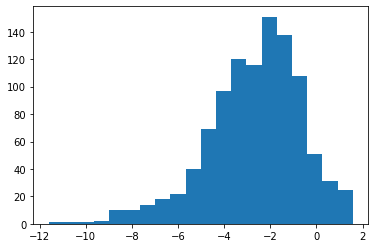

In [8]:
import matplotlib.pyplot as plt
plt.hist(labels, bins=20)
plt.show()

### Feature Engineering 

Now, we have the **df** dataframe that contains the descriptors for molecules and the **labels** list that contains the solvant property of molecules.

Check the dataframe **df** to see whether it contains NaN values. How many row contained NaN values are there in the dataframe **df** ? Remove these rows from  **df** and **labels**.



In [9]:
print(f"The dataframe contains {df.isna().sum().sum()} values.")
print(f"The NaN values are contained in {((df.isna().sum(axis=1)) > 0).sum()} rows.")

The dataframe contains 12 values.
The NaN values are contained in 1 rows.


In [10]:
df.dropna(axis=0, how='any', inplace=True)
len(df)

1024

In [11]:
X_train, y_train = df[df.columns[:-1]], df["SOL"]


Apply the MinMaxScaler to the dataframe **df** to normalize the data.



In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_train

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,0.045160,0.913346,0.045160,0.354103,0.401233,0.042084,0.033447,0.042052,0.072581,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,0.000000,0.933978,0.000000,0.395291,0.323502,0.038831,0.033447,0.038797,0.064516,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,0.046428,0.914831,0.046428,0.357068,0.393731,0.064721,0.053504,0.064685,0.096774,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.076923,0.0
3,0.047803,0.854507,0.047803,0.236639,0.420664,0.064721,0.053504,0.064685,0.096774,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,0.047142,0.807435,0.047142,0.142668,0.344239,0.064721,0.053504,0.064685,0.096774,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1019,0.741391,0.520969,0.741391,0.000686,0.632761,0.643087,0.614932,0.643031,0.653226,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1020,0.668839,0.597984,0.668839,0.017499,0.325982,0.677078,0.638321,0.677036,0.701613,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1021,0.737576,0.428466,0.737576,0.009676,0.536638,0.547628,0.538038,0.547596,0.540323,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1022,0.744553,0.523852,0.744553,0.008605,0.595244,0.668977,0.634988,0.668919,0.685484,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


Instanciate a linear regression and train it to predict the solubility from the features

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
reg = LinearRegression().fit(X_train, y_train)


Calculate the square root error for the dataset

In [14]:
from sklearn.metrics import mean_squared_error
print(f"Score: {reg.score(X_train, y_train)}")
print(f"Square root error: {mean_squared_error(y_train, reg.predict(X_train))}")

Score: 0.9394300317086726
Square root error: 0.2514142654177348


Plot the differences between prediction and labels

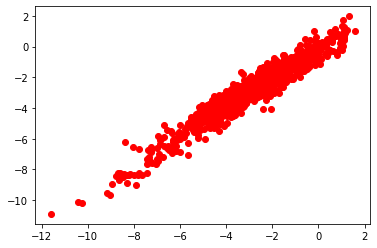

In [15]:
import matplotlib.pyplot as plt
plt.scatter(y_train, reg.predict(X_train), color='r')
plt.show()

<p style="color: red">
    On a un très bon modèle.
</p>

### Evaluating on test set



Download test set from "https://github.com/rdkit/rdkit/blob/master/Docs/Book/data/solubility.test.sdf"


Note: If there exists problem of reading the file solubility.test.sdf as
"RDKit ERROR: [09:28:36] ERROR: moving to the beginning of the next molecule
RDKit ERROR: [09:32:48] ERROR: Counts line too short: '' on line4"
so, go to the url, click "raw" and save this file by hand. The error will be gone away


In [16]:
!wget "https://github.com/rdkit/rdkit/blob/master/Docs/Book/data/solubility.test.sdf"

--2022-04-17 19:22:34--  https://github.com/rdkit/rdkit/blob/master/Docs/Book/data/solubility.test.sdf
Loaded CA certificate '/etc/ssl/certs/ca-certificates.crt'
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘solubility.test.sdf.6’

solubility.test.sdf     [   <=>              ]   3.03M  7.14MB/s    in 0.4s    

2022-04-17 19:22:36 (7.14 MB/s) - ‘solubility.test.sdf.6’ saved [3182099]




Read molecules from this file and store them in a list named **list_molecule_test**.


In [17]:
list_molecule_test = SDMolSupplier("solubility.test.sdf", removeHs=False)
len(molecule_list)

1025


Take a molecule from the **list_molecule_test** and then calculate its descriptions thank to the **calculate_descriptors(mol)** function that you've coded above.



In [18]:
mol = list_molecule_test[42]
mol_descs = calculate_descriptors(mol)


Apply **minmaxscaler** to these descriptors. Note that **minmaxscaler**  is one that you've created for the training (do not fit again, only transform !!)



In [19]:
X_test = scaler.transform(pd.DataFrame(mol_descs.reshape(1, -1), columns=X_train.columns))
X_test = pd.DataFrame(X_test, columns=X_train.columns)


Use the model that you've trained to predict the aqueous solubility (logS) of the molecule. Compare to the real logS value of the molecule.



In [20]:
y_test = [float(mol.GetProp("SOL"))]
#y_test = pd.Series(y_test, name="SOL")
#y_test
y_pred = reg.predict(X_test)

Calculate the mean square root error of the model for this data. Compare it to the one of training set. Does it overfit ? 

In [21]:
print(f"Square root error: {mean_squared_error(y_test, y_pred) }")

Square root error: 0.1443079847205575


In [22]:
0.2514142654177348 / len(X_train)

0.00024552174357200666

<p style="color: red">
On avait une square root error de 0.25 pour tout le dataset d'entrainement.
<br/>
Donc une sre de 0.00024 par molécule en moyenne.
<br/>
Ici on a une sre de 0.14 pour une seule molécule.
<br/>
Donc le modèle a clairement overfité nos données d'entrainement.    
</p>

### Other models (bonus)

Try to do hyperparameter search to find better linear models (check regularisation) 



Try to test with support vector machine

Try to test with gradient boosting regressor

Try to test with a small Feedforward network